In [1]:

#pip install tensorflow
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist=keras.datasets.fashion_mnist

In [3]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [4]:
X_train_full.shape,y_train_full.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [6]:
nsamples,nx,ny=X_train_full.shape
X_train_2d=np.reshape(X_train_full,(nsamples,nx*ny))
nsamples,nx,ny=X_test.shape
X_test_2d=np.reshape(X_test,(nsamples,nx*ny))

In [7]:
X_train_2d.shape

(60000, 784)

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

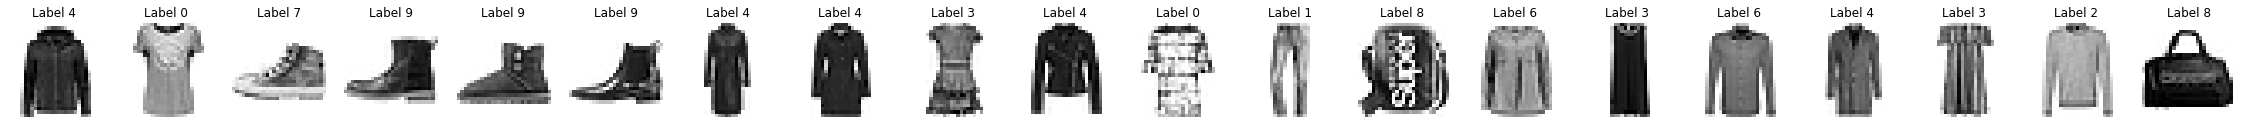

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 50))

for i in range(20):
  plt.subplot(100 // 25, 25, i + 1)
  plt.imshow(X_train[i], cmap="binary")
  plt.title("Label {}".format(y_train[i]))
  plt.axis('off')
plt.show()

In [10]:
nsamples, nx, ny = X_train.shape
X_train_2d=[]
for i in range(nsamples):
  X_train_2d.append(X_train[i].reshape(nx*ny))

In [11]:
nsamples, nx, ny = X_test.shape
X_new_test=[]
for i in range(nsamples):
  X_new_test.append(X_test[i].reshape(nx*ny))

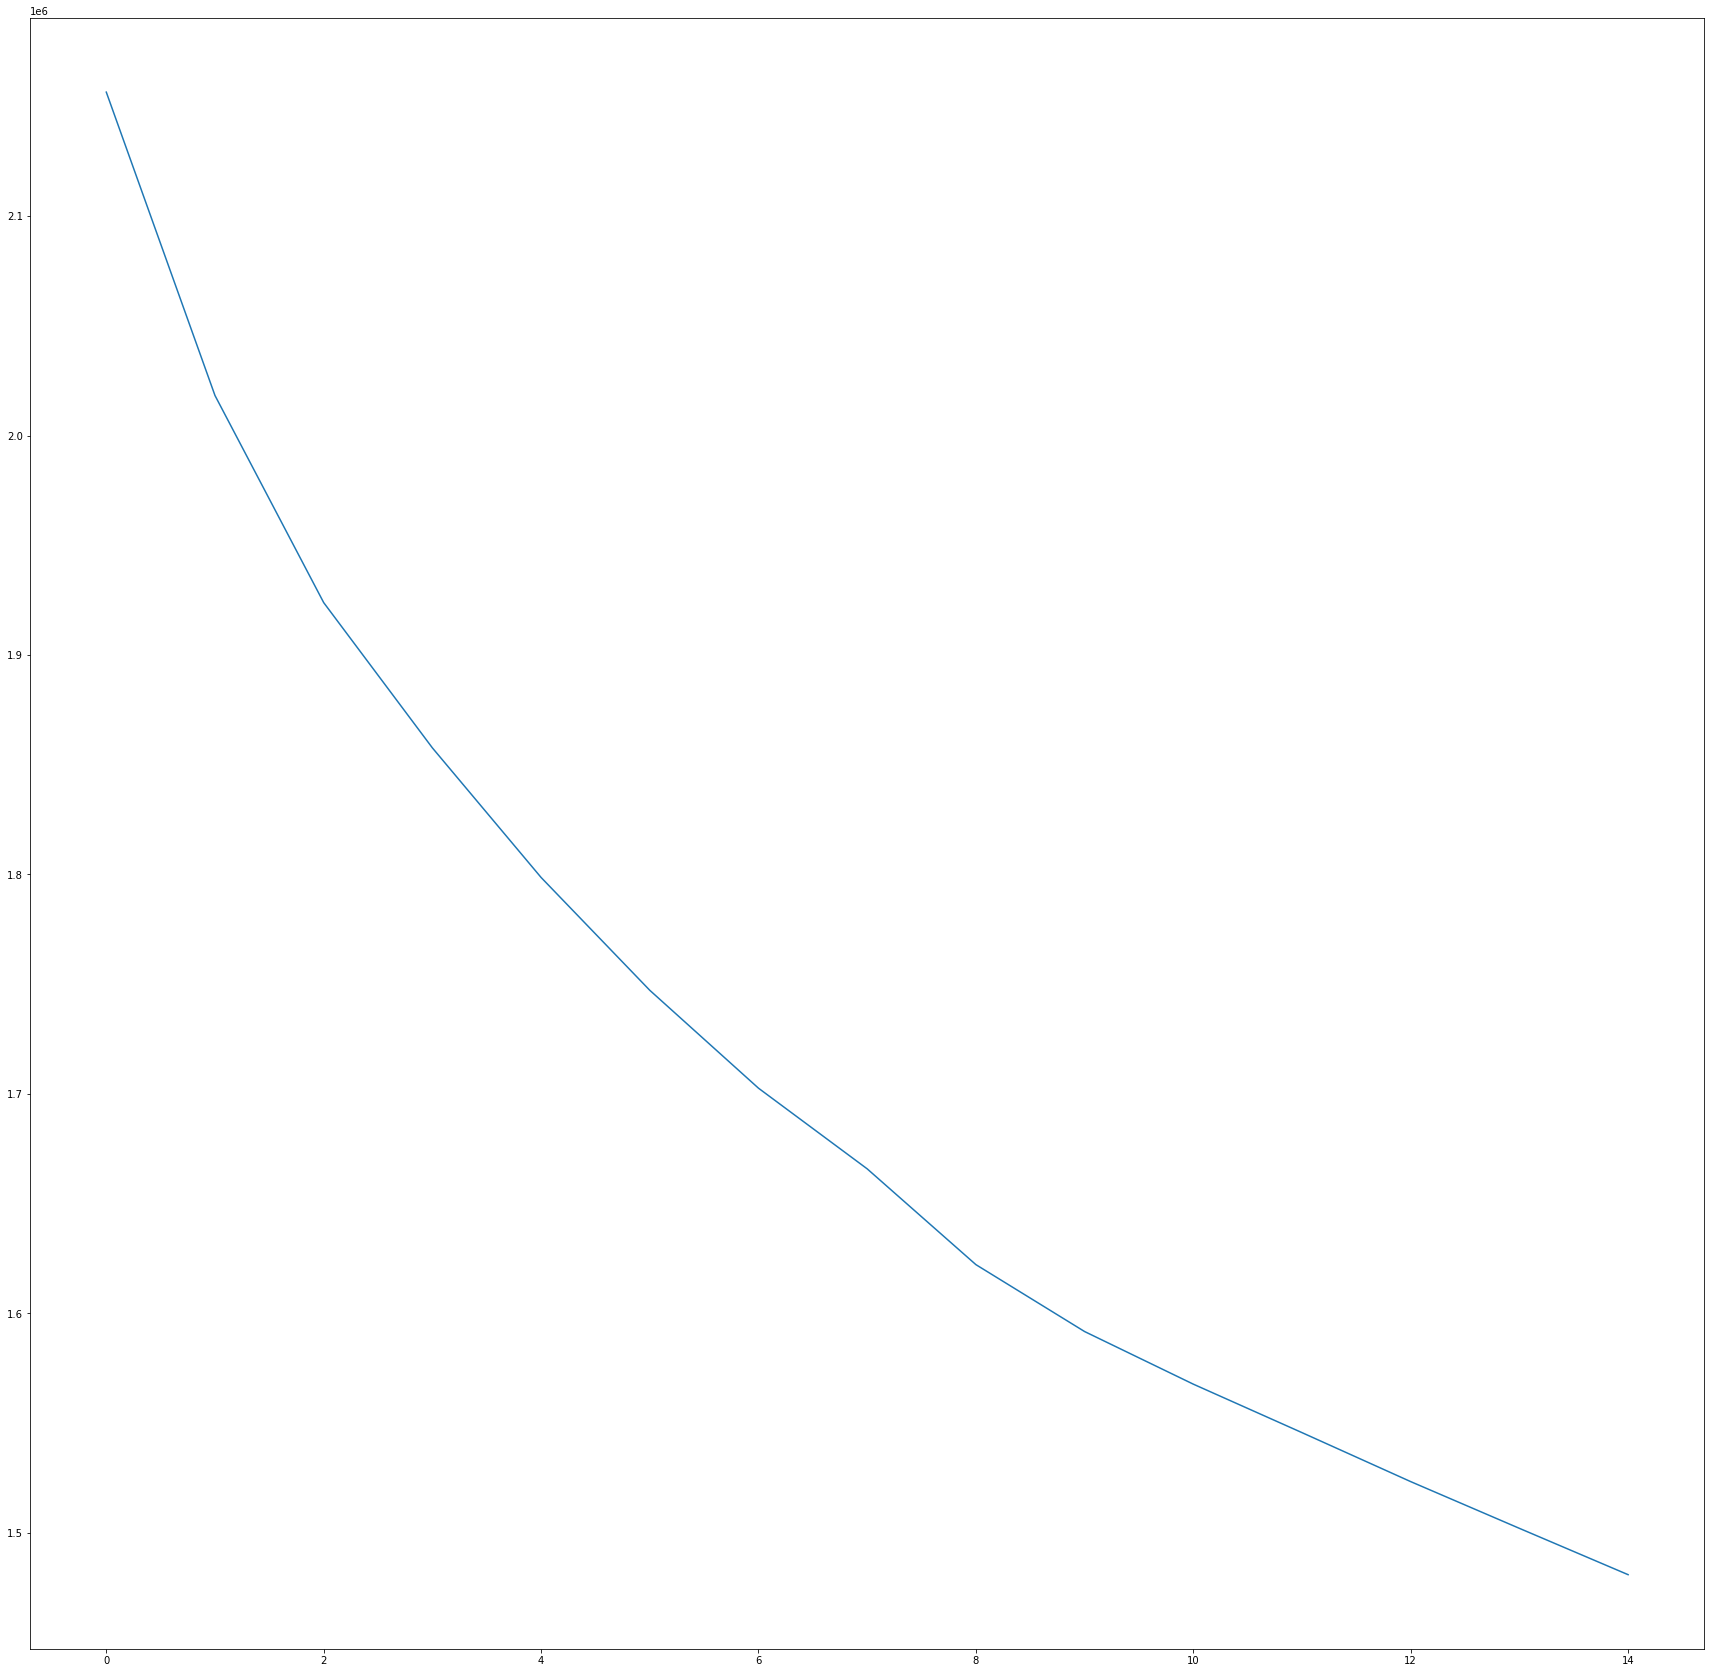

In [12]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
inertia=[]
plt.figure(figsize=(30, 30))
for k in range(5,20):
  kmeans = KMeans(n_clusters=k,random_state=32)
  y_pred = kmeans.fit_predict(X_train_2d)
  inertia.append(kmeans.inertia_)

plt.plot(inertia)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

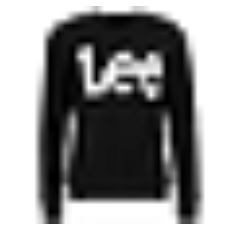

In [13]:
#plt.subplot(100 // 25, 25, index + 1)
plt.imshow(X_new_test[1].reshape(28, 28), cmap="binary", interpolation="bilinear")
plt.axis('off')
plt.show

In [ ]:
y_representative_digits 

In [21]:
X_representative_digits=cluster(100,X_train_2d)
y_representative_digits=kmean.labels_
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(8):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

NameError: name 'kmean' is not defined

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
len(X_train_2d),y_train_propagated.shape

In [ ]:
history=model.fit(np.array(X_train_2d),y_train,epochs=30)

In [38]:
X_new_test=np.array(X_new_test)
y_test=np.array(y_test)
model.evaluate(X_new_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3306 - accuracy: 0.8836


[0.3305521607398987, 0.8835999965667725]

In [39]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [14]:
def cluster(k,X_train_2d):
    kmeans = KMeans(n_clusters=k,random_state=32)
    X_digits_dist = kmeans.fit_transform(X_train_2d)
    representative_digit_idx = np.argmin(X_digits_dist, axis=0)
    X_train_2d=np.array(X_train_2d)
    X_representative_digits = X_train_2d[representative_digit_idx]
    return X_representative_digits

In [15]:
def cluster_label_images(k):
    X_representative_digits=cluster(k,X_train_2d)
    plt.figure(figsize=(50, 50))
    for index, X_representative_image in enumerate(X_representative_digits):
        plt.subplot(100 // 25, 25, index + 1)
        plt.imshow(X_representative_image.reshape(28, 28), cmap="binary", interpolation="bilinear")
        plt.axis('off')
    plt.show()
    return

In [16]:
def log_cluster(k,y_representative_digits):
    X_representative_digits=cluster(k,X_train_2d)
    y_train_propagated = np.empty(len(X_train), dtype=np.int32)
    for i in range(k):
        y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    log_reg = LogisticRegression()
    log_reg.fit(X_train_2d, y_train_propagated)
    y_pred=log_reg.predict(X_new_test)
    return log_reg.score(X_new_test, y_test)

# Using 10 Clusters

In [17]:
cluster(100,X_train_2d)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

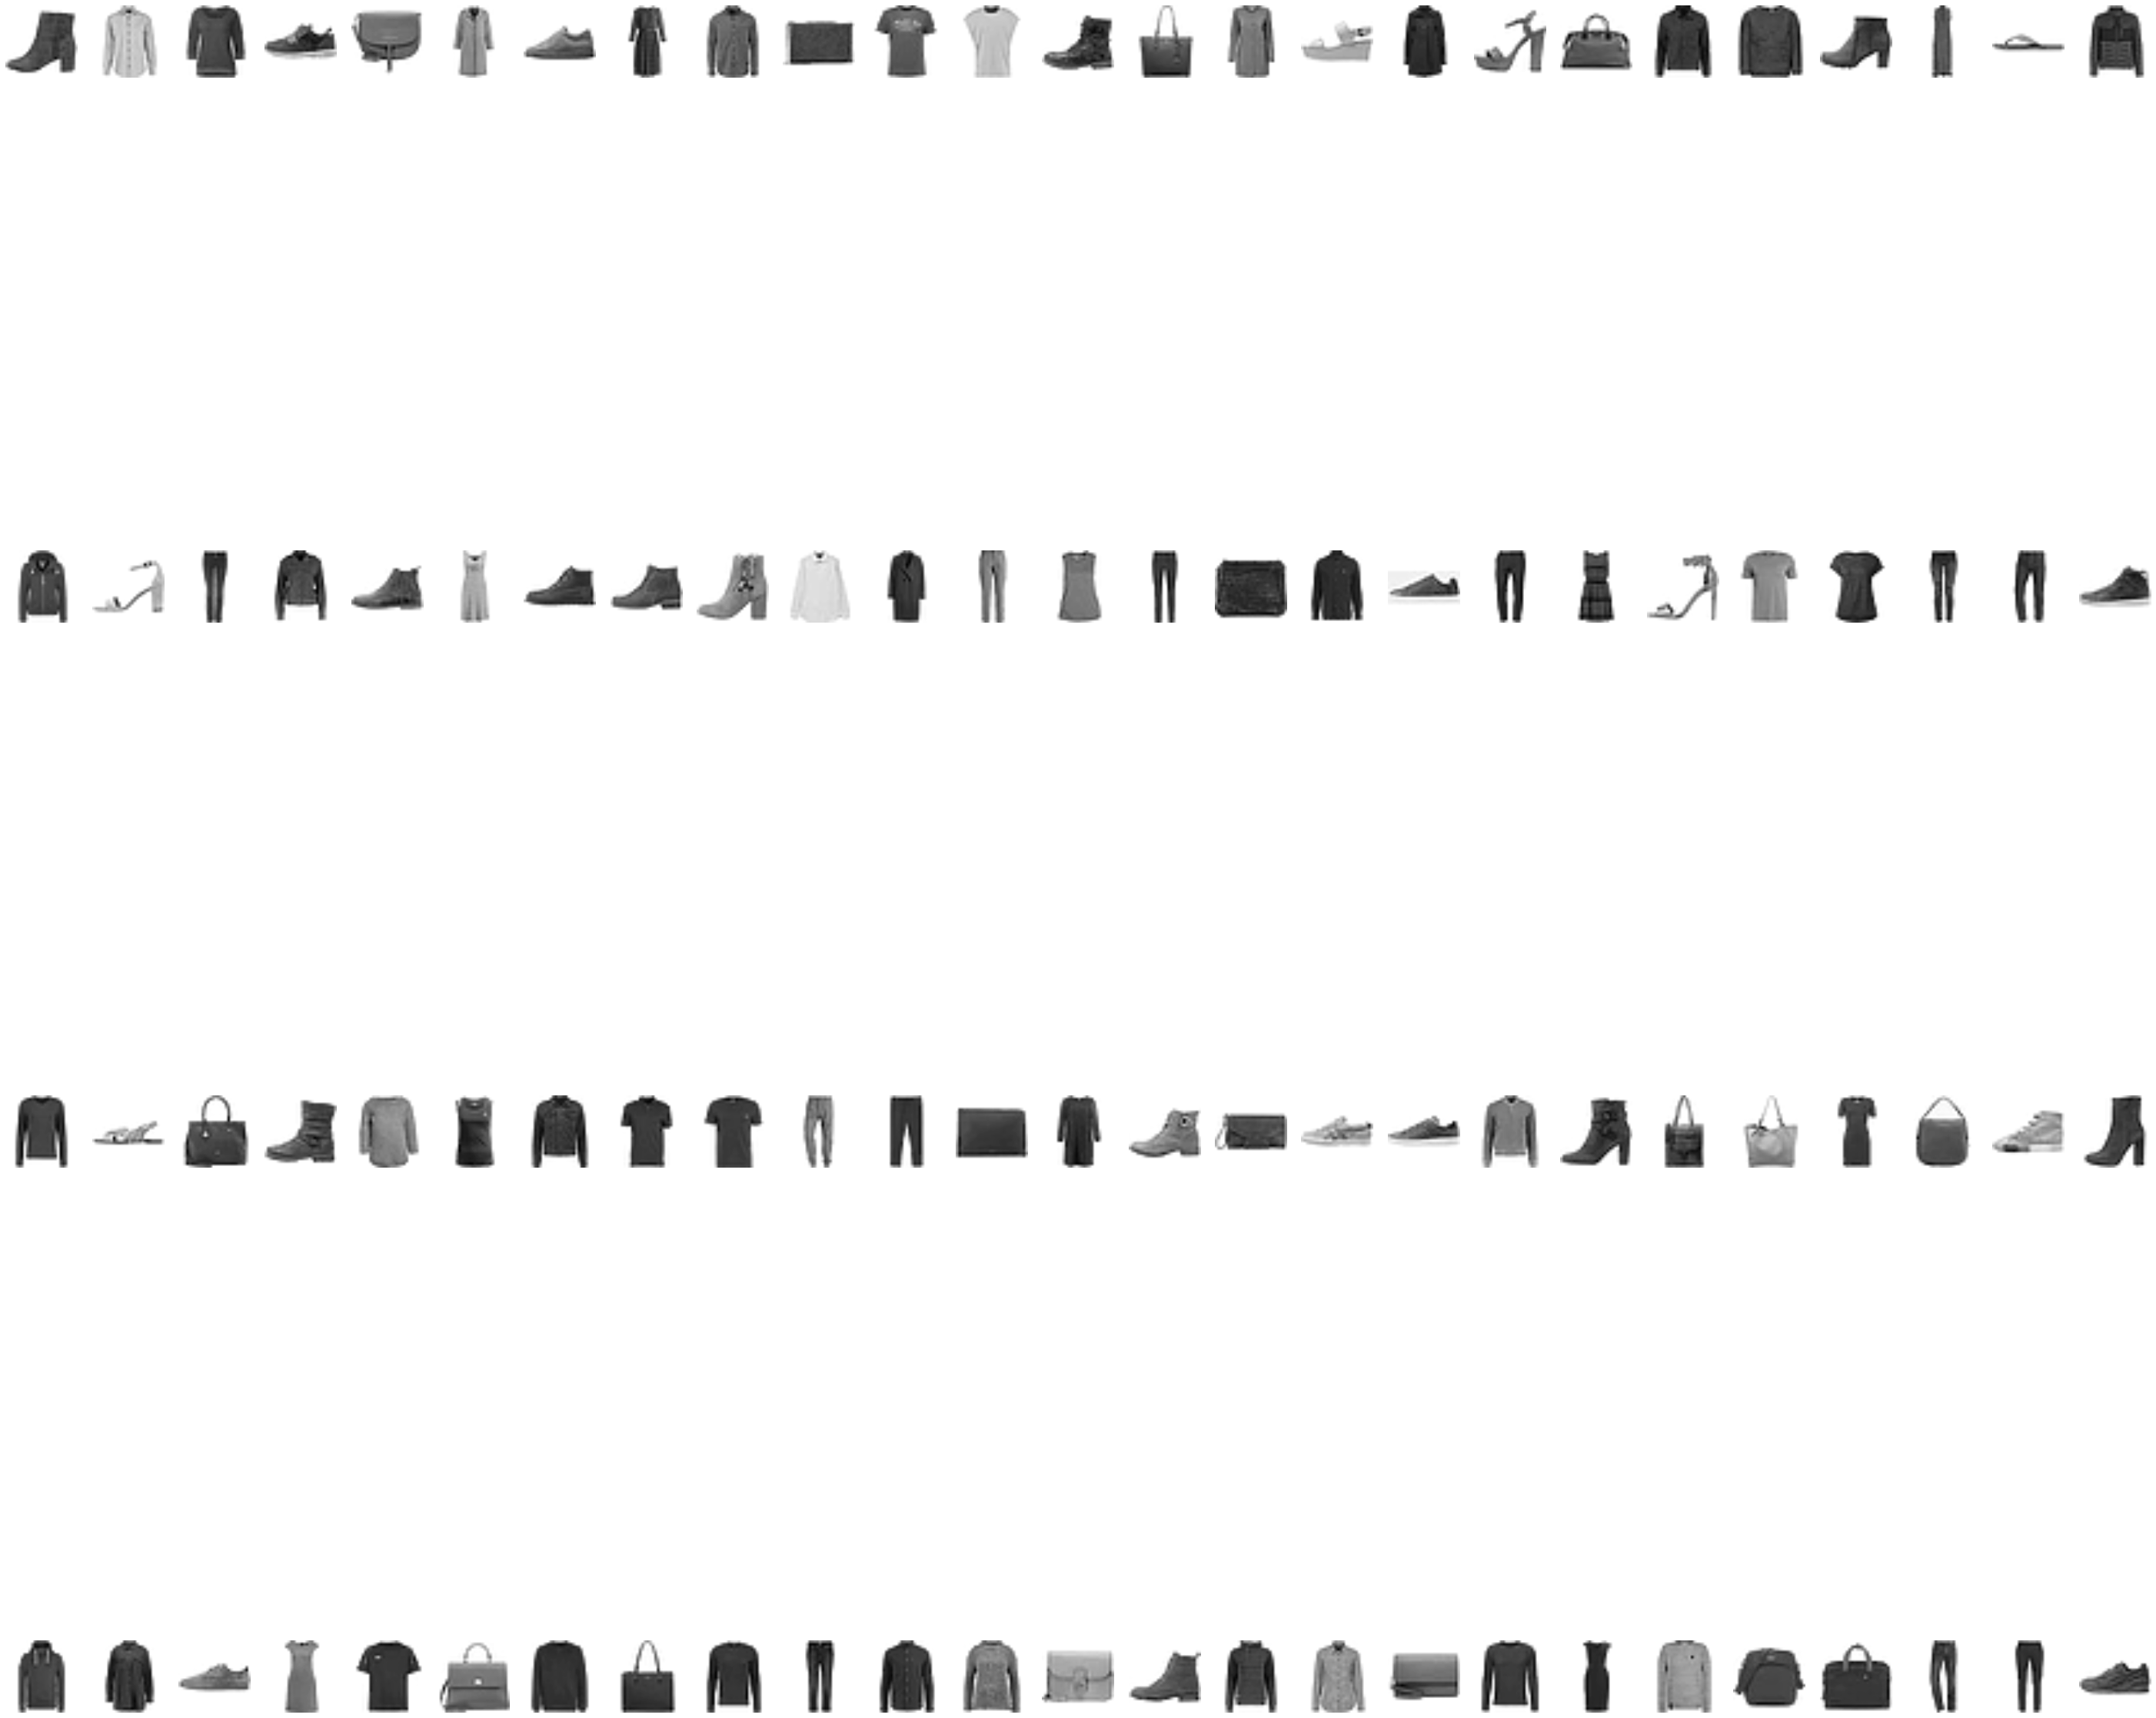

In [18]:
cluster_label_images(100)

In [27]:
y_representative_digits=[9,2,8,1,9,6,0,7,8,3]

In [19]:
log_cluster(100,kmeans.labels_)

C:\Users\Sucheta Jhunjhunwala\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.0704

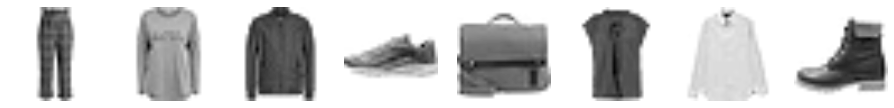

In [29]:
cluster(8,X_train_2d)
cluster_label_images(8)

In [30]:
y_representative_digits=[1,3,2,7,8,0,6,9]

In [31]:
log_cluster(8,y_representative_digits)

C:\Users\Sucheta Jhunjhunwala\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.2681

In [40]:
history = model.fit(X_train_2d, y_train_propagated, epochs=30)

ValueError: Data cardinality is ambiguous:
  x sizes: 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784, 784
  y sizes: 55000
Make sure all arrays contain the same number of samples.